## Rank Prediction Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                            StackingRegressor, BaggingRegressor, GradientBoostingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import pickle
import os

2023-05-14 17:58:57.858461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../../2-cleaning-EDA/data/cleaned_random_replays.csv')

In [3]:
boay = pd.read_csv('../../2-cleaning-EDA/data/boay_cleaned.csv')
eden = pd.read_csv('../../2-cleaning-EDA/data/eden_cleaned.csv')
vinu = pd.read_csv('../../2-cleaning-EDA/data/vinu_cleaned.csv')
cho = pd.read_csv('../../2-cleaning-EDA/data/cho_cleaned.csv')

In [4]:
df.head()

,shots,goals,saves,assists,score,mvp,bcpm,avg_amount,amount_collected,amount_stolen,...,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,player_rank,numeric_rank
0,0,0,1,0,220,0,241.58151,33.00,1332,224,...,68.022736,31.977266,45.251194,33.099570,27.174898,47.548515,0,0,Silver 2 Division 2,18
1,0,0,0,0,90,0,200.77383,42.48,1107,137,...,63.572340,36.427658,32.736835,31.013844,35.578260,27.416721,1,0,Silver 2 Division 2,18
2,0,0,0,0,74,0,114.26153,34.05,630,60,...,64.225230,35.774780,25.391450,34.973700,36.606007,28.021280,0,1,Silver 2 Division 2,18
3,0,0,0,0,24,0,137.69020,14.24,276,60,...,58.668950,41.331055,16.130373,35.004574,41.739420,16.462957,0,0,Platinum 1 Division 1,37
4,2,0,0,0,92,0,154.41177,43.05,672,183,...,65.157740,34.842260,27.113974,41.015625,31.709558,34.964767,0,1,Silver 3 Division 4,24


## Dictionary of ranks

In [5]:
name_ranks = list(df.player_rank.unique())

In [6]:
number_ranks = list(df.numeric_rank.unique())

In [7]:
sorted(list(zip(number_ranks, name_ranks)))

[(1, 'Bronze 1 Division 1'),
 (2, 'Bronze 1 Division 2'),
 (3, 'Bronze 1 Division 3'),
 (4, 'Bronze 1 Division 4'),
 (5, 'Bronze 2 Division 1'),
 (6, 'Bronze 2 Division 2'),
 (7, 'Bronze 2 Division 3'),
 (8, 'Bronze 2 Division 4'),
 (9, 'Bronze 3 Division 1'),
 (10, 'Bronze 3 Division 2'),
 (11, 'Bronze 3 Division 3'),
 (12, 'Bronze 3 Division 4'),
 (14, 'Silver 1 Division 2'),
 (15, 'Silver 1 Division 3'),
 (16, 'Silver 1 Division 4'),
 (17, 'Silver 2 Division 1'),
 (18, 'Silver 2 Division 2'),
 (19, 'Silver 2 Division 3'),
 (20, 'Silver 2 Division 4'),
 (21, 'Silver 3 Division 1'),
 (22, 'Silver 3 Division 2'),
 (23, 'Silver 3 Division 3'),
 (24, 'Silver 3 Division 4'),
 (25, 'Gold 1 Division 1'),
 (26, 'Gold 1 Division 2'),
 (27, 'Gold 1 Division 3'),
 (28, 'Gold 1 Division 4'),
 (29, 'Gold 2 Division 1'),
 (30, 'Gold 2 Division 2'),
 (31, 'Gold 2 Division 3'),
 (32, 'Gold 2 Division 4'),
 (33, 'Gold 3 Division 1'),
 (34, 'Gold 3 Division 2'),
 (35, 'Gold 3 Division 3'),
 (36, 'Gold

In [8]:
dict_ranks = {}
for i in sorted(list(zip(number_ranks, name_ranks))):
    dict_ranks[i[0]] = i[1]
    
# silver 1 div 1 was not collected, so added manually to the dictionary
dict_ranks[13] = 'Silver 1 Division 1'

In [9]:
with open('../../dict_ranks.pkl', 'wb') as picklefile:
    pickle.dump(dict_ranks, picklefile)

In [10]:
df.drop(columns = 'player_rank', inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
boay.dropna(inplace=True)
eden.dropna(inplace=True)
vinu.dropna(inplace= True)

In [13]:
to_drop = [
    'shots',
    'goals',
    'saves',
    'assists',
    'score',
    'mvp',
    'taken'
]

In [14]:
df.drop(columns = to_drop, inplace=True)


In [15]:
boay.drop(columns = to_drop, inplace=True)
eden.drop(columns = to_drop, inplace=True)
vinu.drop(columns = to_drop, inplace=True)
cho.drop(columns = to_drop, inplace=True)


In [16]:
boay.drop(columns = 'Unnamed: 0', inplace=True)
eden.drop(columns = 'Unnamed: 0', inplace=True)
vinu.drop(columns = 'Unnamed: 0', inplace=True)
cho.drop(columns = 'Unnamed: 0', inplace=True)

## Train test split

In [17]:
X = df.drop(columns = 'numeric_rank')
y = df.numeric_rank

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [18]:
y_base = [y.mean()] * len(y_train)

## Linear Regression
---
- R<sup>2</sup> scores are low variance, reasonably low in performance however with high bias

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6837922897605204

In [20]:
lr.score(X_test, y_test)

0.6686761883282346

## Baseline Model
---
- baseline R<sup>2</sup> scores are very low in comparison to the LR model 

In [21]:
lr.fit(X_train, y_base)

LinearRegression()

In [22]:
lr.score(X_train, y_train)

-1.6550398429515667e-07

In [23]:
lr.score(X_test, y_test)

-1.4978557585365593e-06

In [24]:
ss = StandardScaler()

# X_train = ss.fit_transform(X_train)
# X_test= ss.transform(X_test)

In [25]:
poly = PolynomialFeatures(interaction_only=True)

# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

In [26]:
lr = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

In [27]:
lr.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [28]:
lr.score(X_train, y_train)

0.6872903414357776

In [29]:
lr.score(X_test, y_test)

0.6764660875826822

## Ridge
---
- Ridge R<sup>2</sup> scores are very similar to Linear Regression, as expected, since the variance is not very high initially

In [30]:
# ridge = RidgeCV(alphas = np.logspace(0,100, 100))
ridge = Pipeline([
    ('ss', StandardScaler()),
    ('ridge', RidgeCV(alphas = np.logspace(0,100, 100)))
])
    
    
ridge.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([1.00000000e+000, 1.02353102e+001, 1.04761575e+002, 1.07226722e+003,
       1.09749877e+004, 1.12332403e+005, 1.14975700e+006, 1.17681195e+007,
       1.20450354e+008, 1.23284674e+009, 1.26185688e+010, 1.29154967e+011,
       1.32194115e+012, 1.35304777e+013, 1.38488637e+014, 1.41747416e+015,
       1.45082878e+016, 1.48496...
       5.85702082e+076, 5.99484250e+077, 6.13590727e+078, 6.28029144e+079,
       6.42807312e+080, 6.57933225e+081, 6.73415066e+082, 6.89261210e+083,
       7.05480231e+084, 7.22080902e+085, 7.39072203e+086, 7.56463328e+087,
       7.74263683e+088, 7.92482898e+089, 8.11130831e+090, 8.30217568e+091,
       8.49753436e+092, 8.69749003e+093, 8.90215085e+094, 9.11162756e+095,
       9.32603347e+096, 9.54548457e+097, 9.77009957e+098, 1.00000000e+100])))])

In [31]:
ridge.score(X_train, y_train)

0.6868137601202886

In [32]:
ridge.score(X_test, y_test)

0.6768337467889207

## Random Forest Regressor
---
- RF R<sup>2</sup> scores are higher than LR and the null baseline, however are quick high in variance and hence slightly overfit

In [33]:
randf = Pipeline([
    ('ss', StandardScaler()),
    ('randf', RandomForestRegressor())
])

In [34]:
gs_randf = GridSearchCV(
    randf,
    param_grid={
        'randf__n_estimators' : [120],
        'randf__max_depth' : [7],
        'randf__min_samples_split' : [4]
    },
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

In [35]:
gs_randf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('randf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randf__max_depth': [7],
                         'randf__min_samples_split': [4],
                         'randf__n_estimators': [120]},
             verbose=2)

In [36]:
gs_randf.best_params_

{'randf__max_depth': 7,
 'randf__min_samples_split': 4,
 'randf__n_estimators': 120}

In [37]:
gs_randf.score(X_train, y_train)

0.8108016980897221

In [38]:
gs_randf.score(X_test, y_test)

0.7068684250259912

In [46]:
with open('../../rf_model_1.pkl', 'wb') as picklefile:
    pickle.dump(gs_randf.best_estimator_, picklefile)

[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  14.0s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=   6.5s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  14.1s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  14.1s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  14.0s


## Extra Trees Regressor
---
- ET R<sup>2</sup> scores are very similar to the random forest scores above
- high variance, low bias

In [39]:
et = Pipeline([
    ('ss', StandardScaler()),
    ('et', ExtraTreesRegressor())
])

In [40]:
gs_et = GridSearchCV(
    et,
    param_grid={
        'et__n_estimators' : [90],
        'et__min_samples_split' : [3],
        'et__max_depth' : [8],
        'et__min_samples_leaf' : [2]
    },
    verbose = 1,
    cv = 5,
    n_jobs = -1
)

In [41]:
gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('et', ExtraTreesRegressor())]),
             n_jobs=-1,
             param_grid={'et__max_depth': [8], 'et__min_samples_leaf': [2],
                         'et__min_samples_split': [3],
                         'et__n_estimators': [90]},
             verbose=1)

In [42]:
gs_et.best_params_

{'et__max_depth': 8,
 'et__min_samples_leaf': 2,
 'et__min_samples_split': 3,
 'et__n_estimators': 90}

In [43]:
gs_et.score(X_train, y_train)

0.8016843060602847

In [44]:
gs_et.score(X_test, y_test)

0.705632340672933

## KNN
---
- KNN R<sup>2</sup> scores are better than baseline scores, but high in variance and low in performance, this is not a strong model for this problem

In [45]:
knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)


(0.7586216723279241, 0.6301317133945672)

## Gradient Boosting Regression
---
- GBRT R<sup>2</sup> have the strongest overall test R<sup>2</sup>, at 0.74, and slightly lower variance than ET and RF, so these are the strongest SKlearn models so far 

In [47]:
gbrt = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.8267811705153517, 0.7430540927286029)

In [48]:
pipe_gbrt = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt', GradientBoostingRegressor())
])

In [49]:
gs_gbrt = GridSearchCV(
    pipe_gbrt,
    param_grid={
        'gbrt__n_estimators' : [150],
        'gbrt__learning_rate' : [0.1],
        'gbrt__max_depth' : [5],
        'gbrt__min_samples_split' : [2]
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

In [50]:
gs_gbrt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('gbrt', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gbrt__learning_rate': [0.1], 'gbrt__max_depth': [5],
                         'gbrt__min_samples_split': [2],
                         'gbrt__n_estimators': [150]},
             verbose=1)

In [51]:
gs_gbrt.best_params_

{'gbrt__learning_rate': 0.1,
 'gbrt__max_depth': 5,
 'gbrt__min_samples_split': 2,
 'gbrt__n_estimators': 150}

In [52]:
gs_gbrt.best_estimator_.score(X_train, y_train)

0.9467039628597756

In [53]:
gs_gbrt.best_estimator_.score(X_test, y_test)

0.7571296333095384

In [54]:
gbrt_2 = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt_2', GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=0.8,
                                  min_samples_split=5, min_samples_leaf=5, 
                                  loss = 'squared_error', alpha = 0.5, 
                                  init = 'zero', random_state=42))
])

## GBRT_2
---
- this is the strongest sklearn model fit to the data, it has the highest test R<sup>2</sup> and slightly lower variance than RF and ET
- RMSE is 10.6, meaning on average the model predicts with an error of 10.6 divisions from the actual rank

In [55]:
gbrt_2.fit(X_train, y_train)
gbrt_2.score(X_train, y_train), gbrt_2.score(X_test, y_test)

(0.8476356786620979, 0.7570994575208637)

In [56]:
mean_squared_error(y_test, gbrt_2.predict(X_test), squared = False)

10.59435836956042

In [57]:
gbrt_2.predict(X_test)

array([65.60130714, 51.1844804 , 57.90564458, ..., 64.69302666,
       65.73766396, 26.50514732])

### Example of plot generation

In [58]:
y_test

1050    63
1307    43
4544    71
153     55
946     63
        ..
1726    47
28      78
4870    60
1047    66
2560    22
Name: numeric_rank, Length: 1283, dtype: int64

In [59]:
preds = pd.DataFrame(y_test)

preds['preds'] = gbrt_2.predict(X_test)

preds['dif'] = gbrt_2.predict(X_test) - y_test

In [60]:
preds

,numeric_rank,preds,dif
1050,63,65.601307,2.601307
1307,43,51.184480,8.184480
4544,71,57.905645,-13.094355
153,55,47.971245,-7.028755
946,63,68.333876,5.333876
...,...,...,...
1726,47,41.385060,-5.614940
28,78,80.062445,2.062445
4870,60,64.693027,4.693027
1047,66,65.737664,-0.262336


<Axes: xlabel='numeric_rank', ylabel='dif'>

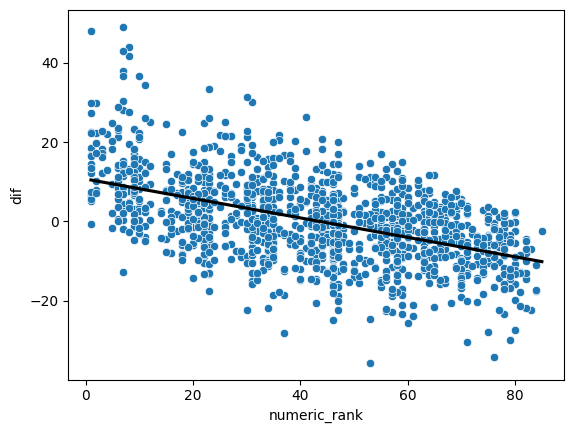

In [61]:
sns.regplot(x = preds.numeric_rank, y = preds.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.dif)

- gradient of 0 would imply equivalence of errors, and a regualar pattern of prediction
- from this gradient, we can infer that lower rank players are on average predicted higher than their rank, and high ranked players are predicted lower

<Axes: xlabel='numeric_rank', ylabel='preds'>

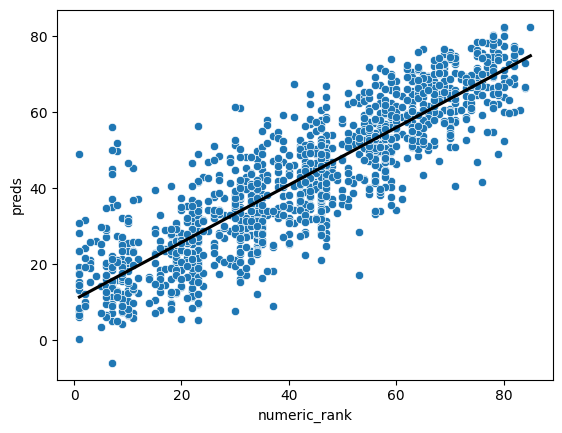

In [62]:
sns.regplot(x = preds.numeric_rank, y = preds.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.preds)

- a perfect model would predict x = y, we can see that the linear nature is being predicted in general but not perfectly.

In [63]:
preds.dif.sort_values()

1075   -35.672047
3879   -34.236714
53     -30.406760
4136   -29.953562
3      -28.037817
          ...    
4696    41.751616
2354    42.952269
902     44.030222
3522    48.117864
1900    49.080510
Name: dif, Length: 1283, dtype: float64

In [64]:
preds.loc[419]

numeric_rank    47.000000
preds           30.358954
dif            -16.641046
Name: 419, dtype: float64

In [65]:
preds_2 = pd.DataFrame(y_test)

preds_2['preds'] = gbrt.predict(X_test)

preds_2['dif'] = gbrt.predict(X_test) - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

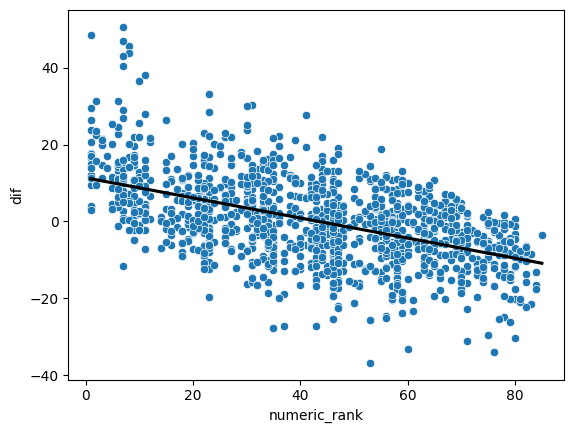

In [66]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

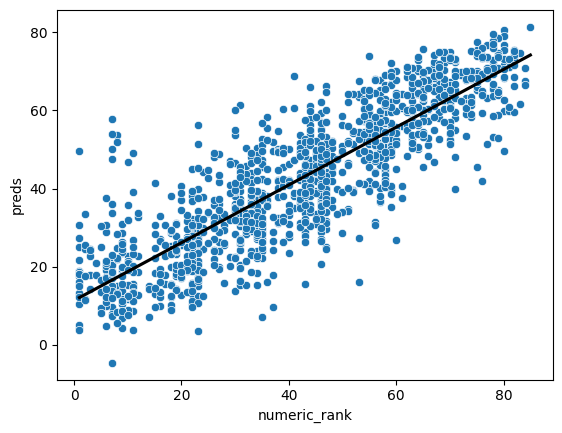

In [67]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.preds)

In [68]:
def eval_models(model, model_name:str, model_df = None, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    '''
    This function takes a model and its string name, and returns the R_squared scores for training and test scores as well as the RMSE score for that model
    it also adds these scores to a df of model scores, and creates plots of the predicted rank vs true rank, and the distribution of the errors for that model
    '''
    if model_df is None:
            model_df = pd.DataFrame(columns = ['train_r2', 'test_r2', 'RMSE'])
            
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, preds, squared = False)
    
    model_df.loc[model_name,:] = [train_r2, test_r2, mse]
    print(model_df)
    
    df = pd.DataFrame(y_test)

    df['preds'] = model.predict(X_test)

    df['dif'] = model.predict(X_test) - y_test
    
    sns.set_style('darkgrid')
    
    fig, axs = plt.subplots(2,1, figsize = (14,12))
    sns.regplot(x = df.numeric_rank, y = df.preds, ci = 0, color = 'black', scatter = False, ax = axs[0])
    
    
    plt.suptitle(f"{model_name.title()} prediction comparison, differences across ranks")
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.preds)
    axs[0].text(20, 60, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.preds, ax = axs[0]).set(
            title = f"{model_name.title()} y_preds vs y_true"
    )
    
    sns.regplot(x = df.numeric_rank, y = df.dif, ci = 0, color = 'black', scatter = False, ax = axs[1])
    
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.dif)

    axs[1].text(60, 20, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.dif, color = 'green', ax= axs[1]).set(
            title = f"{model_name.title()} y_differences vs y_true"
    )
    
    return model_df

                train_r2   test_r2       RMSE
gradient boost  0.826781  0.743054  10.896356


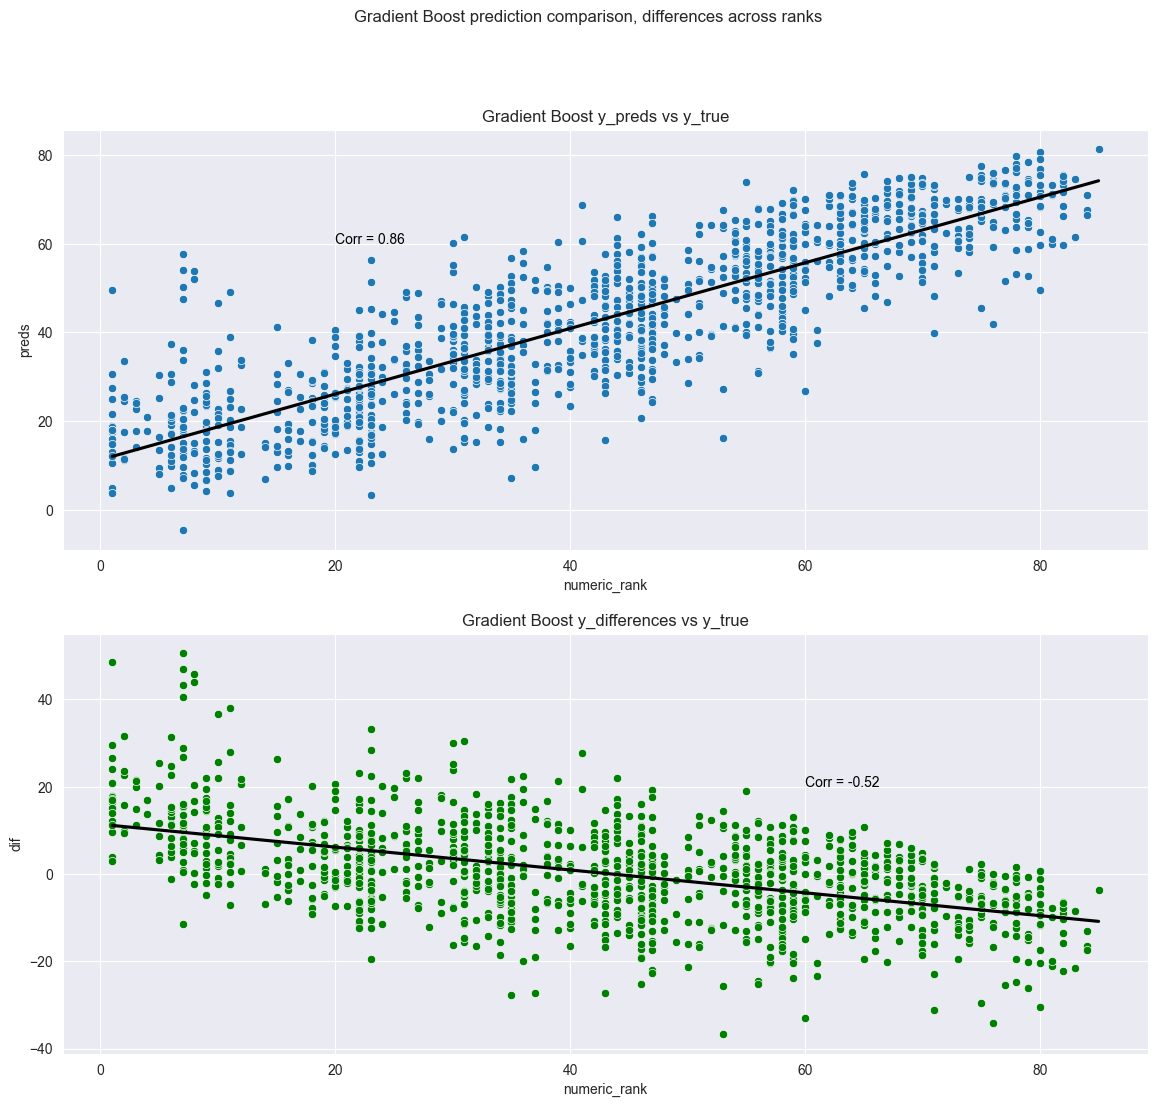

In [69]:
model_df = eval_models(gbrt, 'gradient boost')

                  train_r2   test_r2       RMSE
gradient boost    0.826781  0.743054  10.896356
gradient boost 2  0.847636  0.757099  10.594358


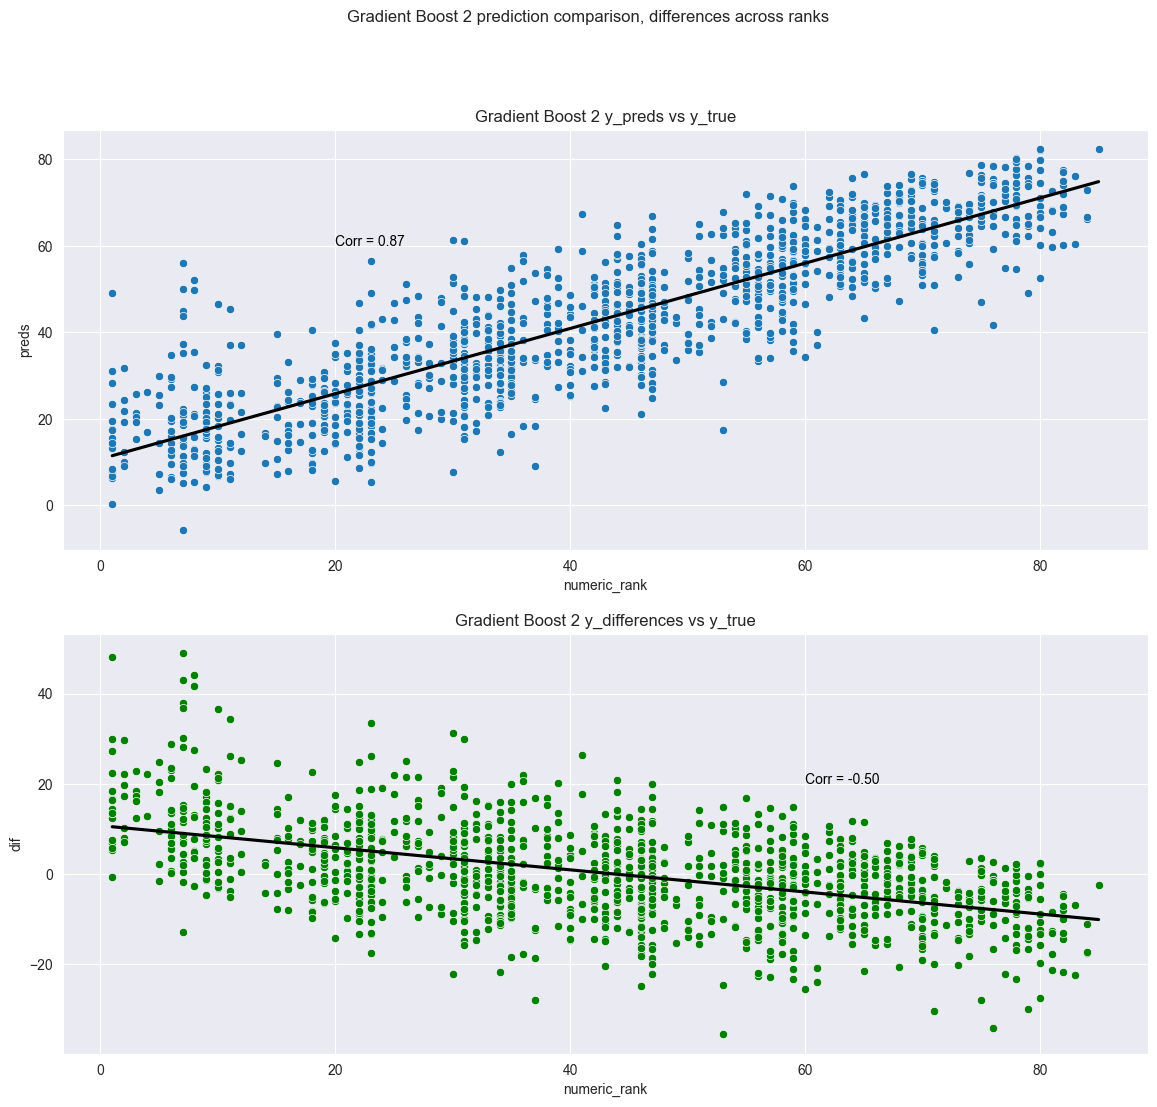

In [70]:
model_df = eval_models(gbrt_2, 'gradient boost 2', model_df = model_df)

                  train_r2   test_r2       RMSE
gradient boost    0.826781  0.743054  10.896356
gradient boost 2  0.847636  0.757099  10.594358
extra trees       0.802663   0.71023  11.571439


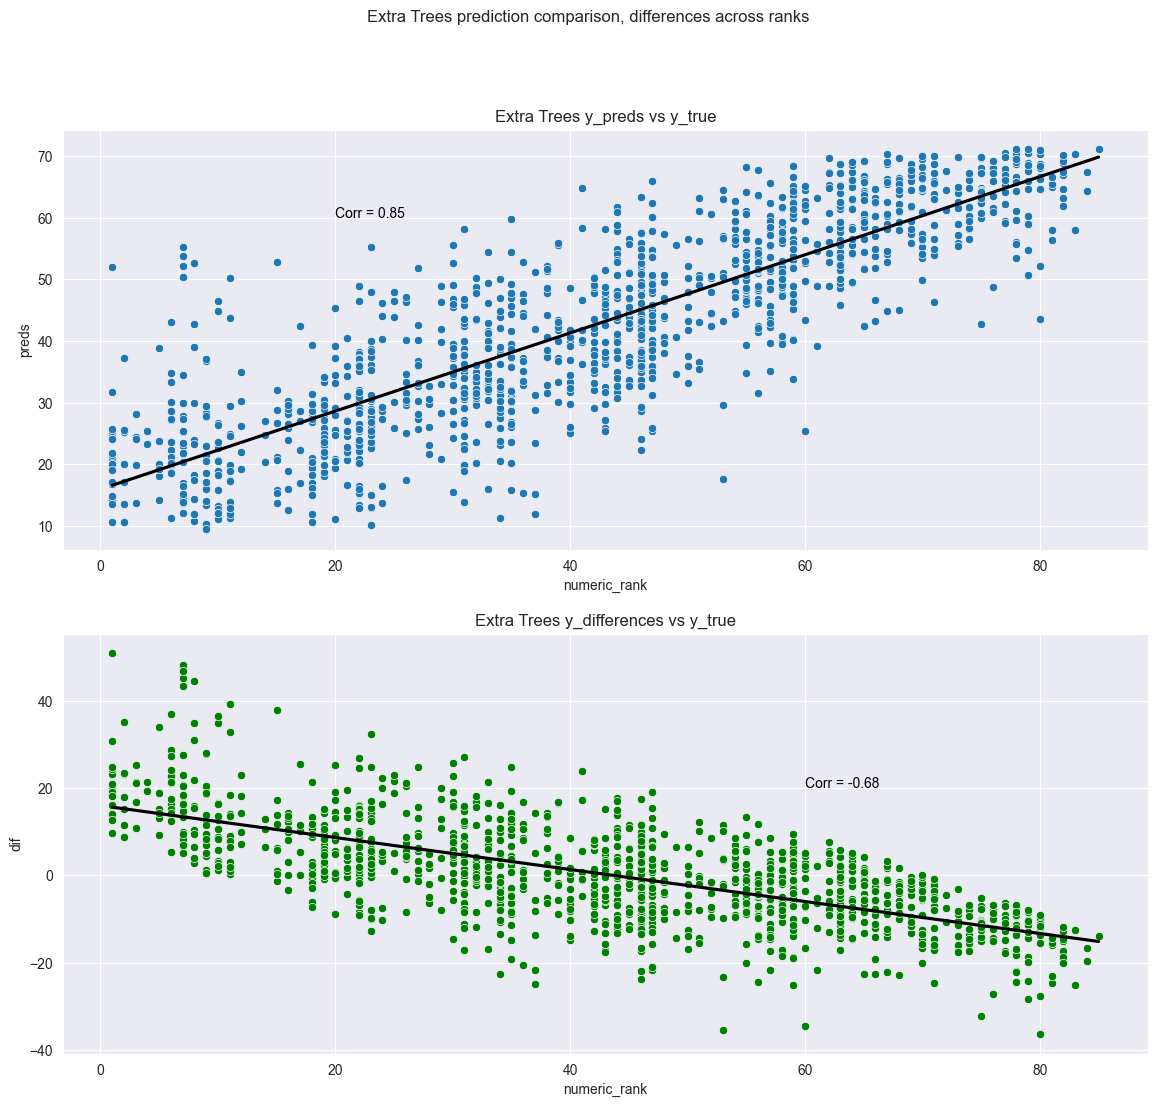

In [71]:
model_df = eval_models(gs_et.best_estimator_, 'extra trees', model_df = model_df)

                  train_r2   test_r2       RMSE
gradient boost    0.826781  0.743054  10.896356
gradient boost 2  0.847636  0.757099  10.594358
extra trees       0.802663   0.71023  11.571439
random forest     0.810986  0.707383  11.628146


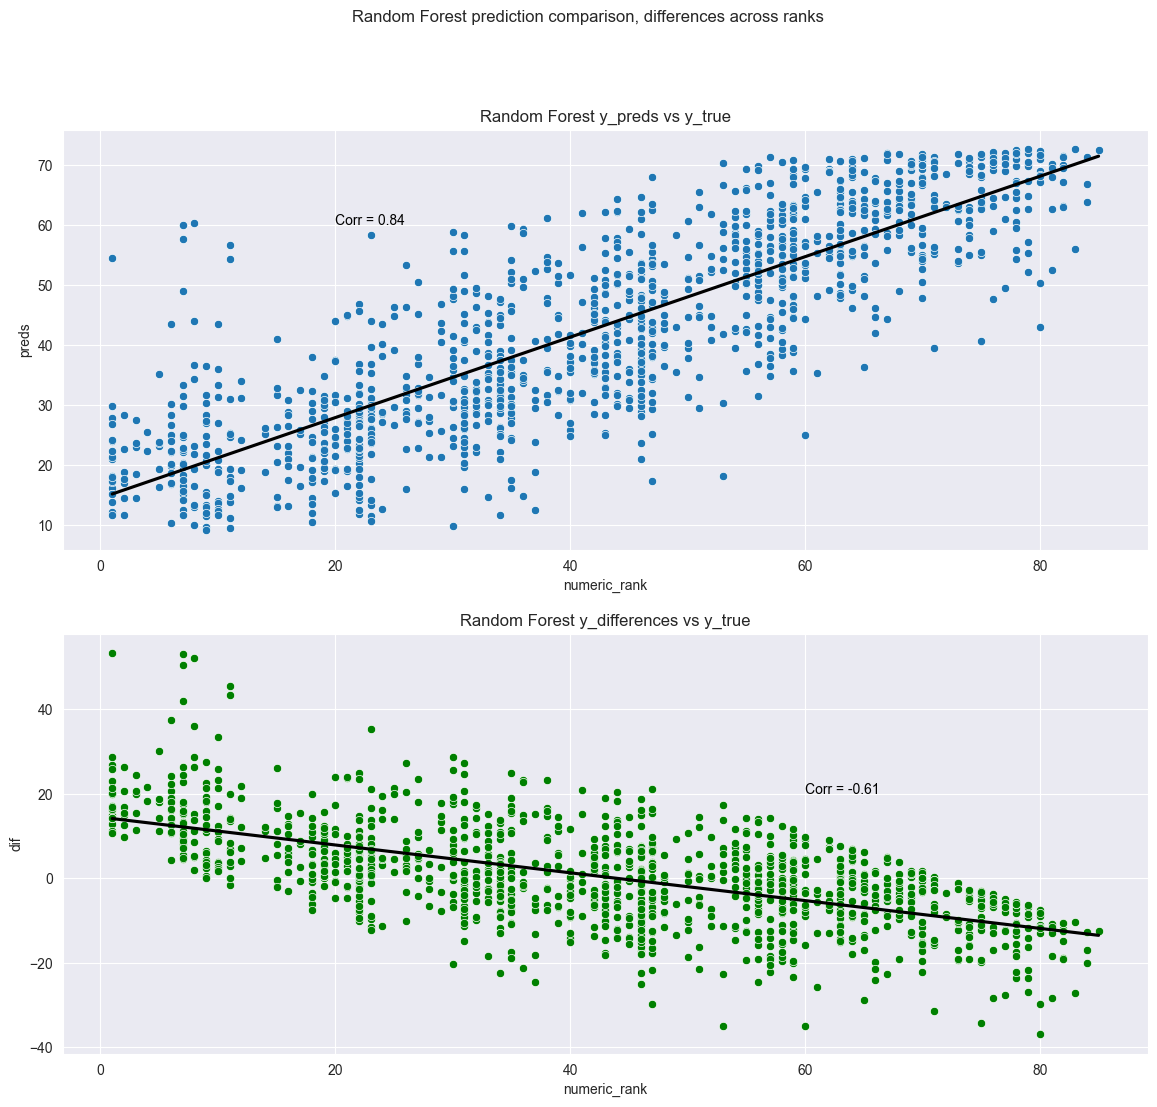

In [72]:
model_df = eval_models(gs_randf.best_estimator_, 'random forest', model_df = model_df)

                  train_r2   test_r2       RMSE
gradient boost    0.826781  0.743054  10.896356
gradient boost 2  0.847636  0.757099  10.594358
extra trees       0.802663   0.71023  11.571439
random forest     0.810986  0.707383  11.628146
k nearest         0.758622  0.630132  13.073262


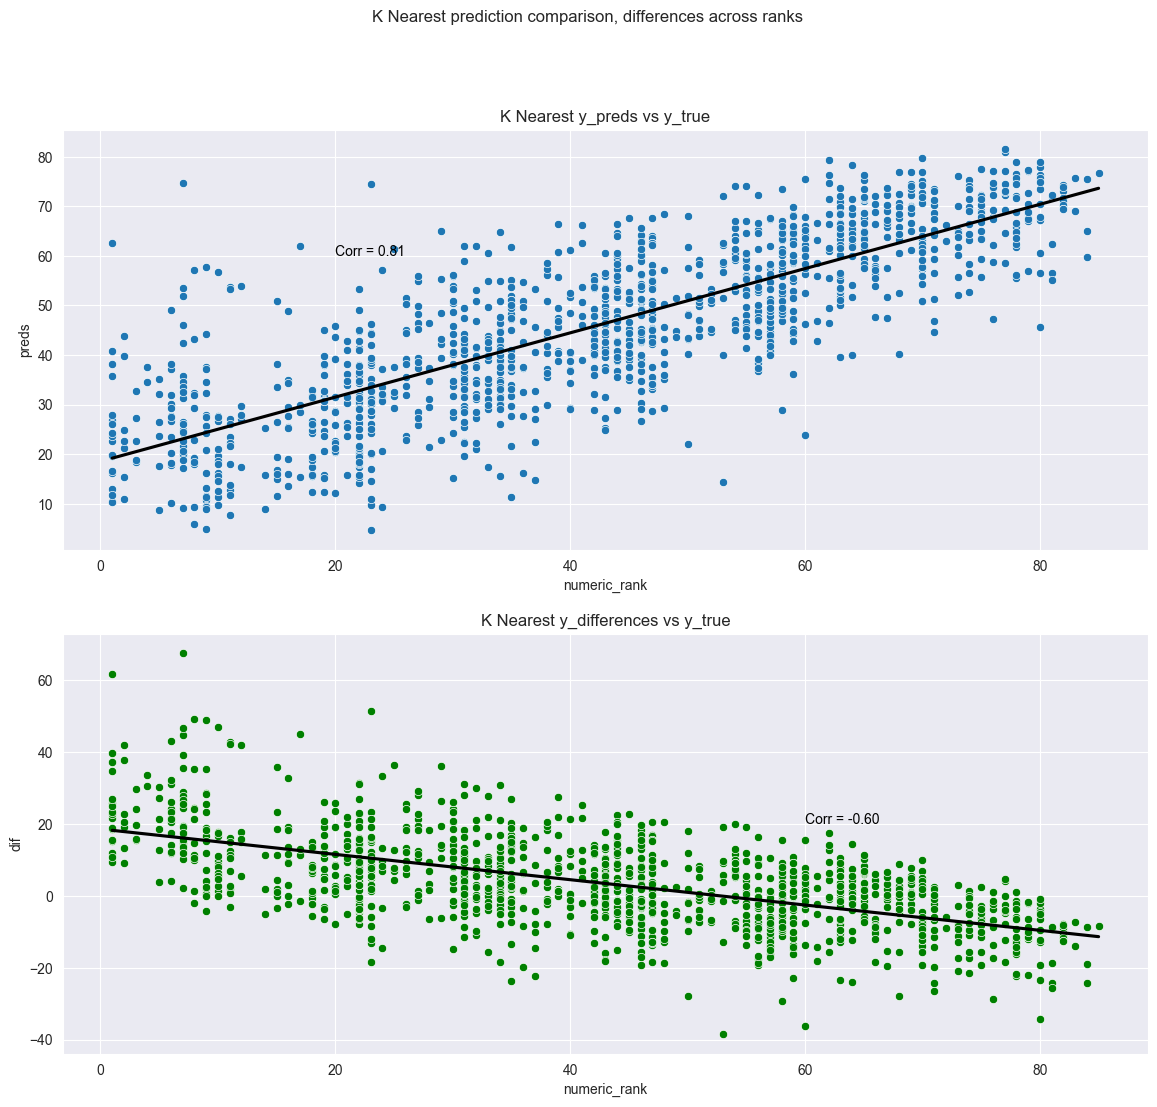

[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  15.0s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=   7.1s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  15.2s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  15.0s
[CV] END randf__max_depth=7, randf__min_samples_split=4, randf__n_estimators=120; total time=  15.1s


In [73]:
model_df = eval_models(knn, 'k nearest', model_df = model_df)

                          train_r2   test_r2        MSE
gradient boost            0.825483  0.741011  10.939589
gradient boost 2            0.8485    0.7578  10.579077
extra trees               0.805168  0.710879  11.558469
random forest             0.809671  0.705284  11.669769
k nearest                  0.75753   0.63317  13.019461
gradient boost (overfit)  0.947228  0.756691  10.603269


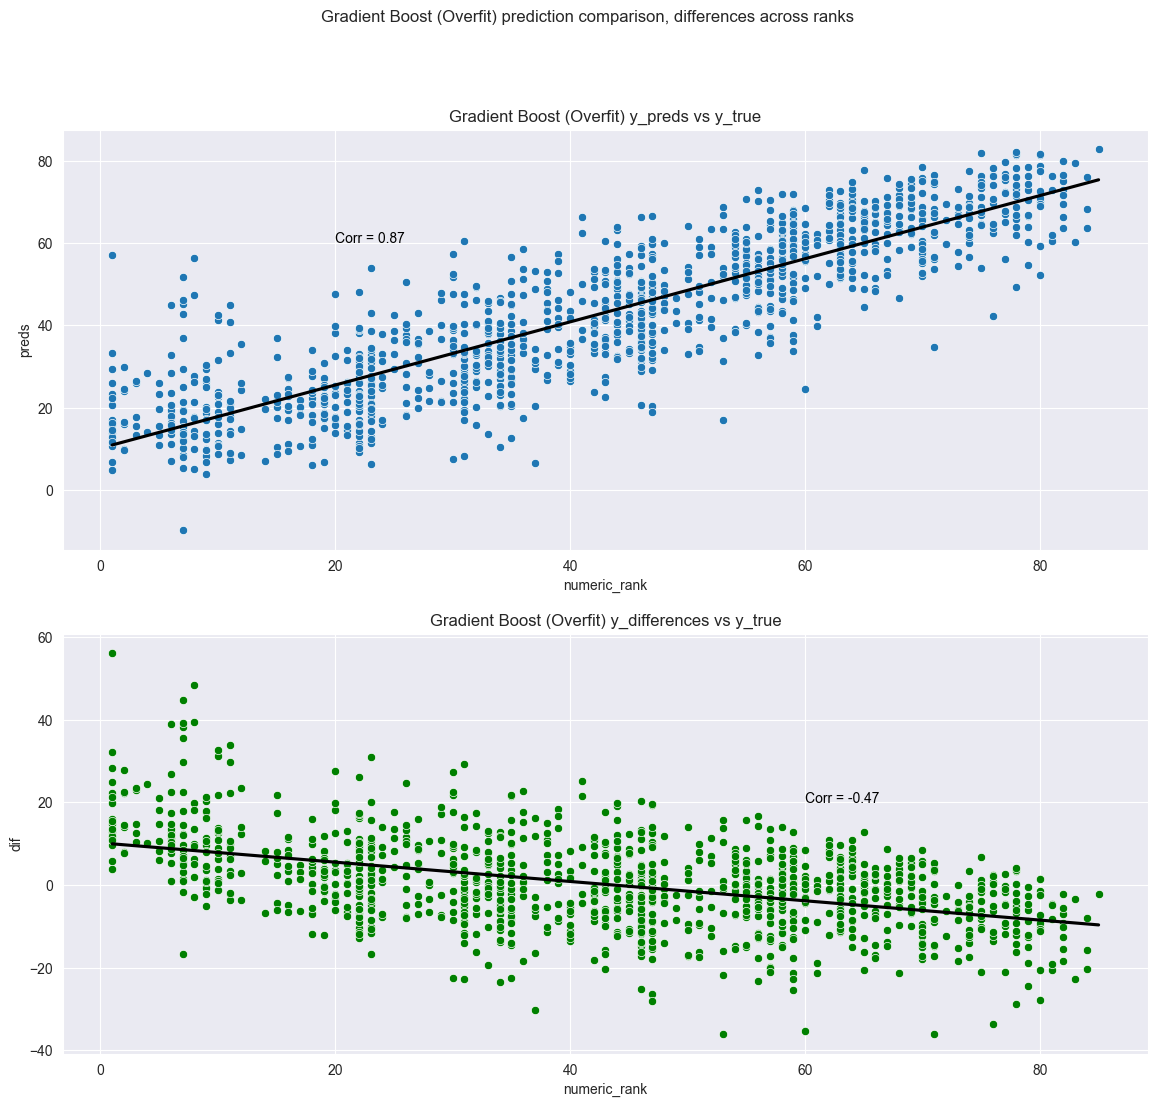

In [107]:
model_df = eval_models(gs_gbrt.best_estimator_, 'gradient boost (overfit)', model_df= model_df)

## Conclusions from these plots
---

### Gradient Boosting Regressor
---
These are the strongest models, they have the tightest spread of predictions from the line of best fit, and also have the smallest gradient in the plots of the errors across each rank

### RF and ET
---
These models have a very large spread of predictions, making them less reliable models than the GBRT models

In [98]:
X_train.shape

(3846, 39)

In [74]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [14]:
with open('../../ss.pkl', 'wb') as picklefile:
    pickle.dump(ss, picklefile)

In [21]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model = Sequential()

model.add(Dense(32,
                input_shape = (39,),
                activation = 'relu'
               )
         )
model.add(Dense(6,
                activation = 'relu'
               )
         )

# model.add(Dense(3,
#                 activation = 'relu'
#                )
#          )

model.add(Dense(1,
                activation = 'linear'
               )
         )

model.compile(
    optimizer='adam',               
    loss='mean_squared_error',       
    metrics=['mse', 'mae']  
)

In [22]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience = 20,
                           min_delta = 0.00,
                           restore_best_weights=True
                          )

In [23]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 2500, 
          batch_size = 256,
          callbacks = [early_stop]
                   )

Epoch 1/2500
16/16 [==============================] - 2s 24ms/step - loss: 2342.4712 - mse: 2342.4712 - mae: 43.2592 - val_loss: 2301.1521 - val_mse: 2301.1521 - val_mae: 42.8512
Epoch 2/2500
16/16 [==============================] - 0s 9ms/step - loss: 2286.1558 - mse: 2286.1558 - mae: 42.6538 - val_loss: 2253.9353 - val_mse: 2253.9353 - val_mae: 42.3090
Epoch 3/2500
16/16 [==============================] - 0s 10ms/step - loss: 2239.8210 - mse: 2239.8210 - mae: 42.1071 - val_loss: 2207.0896 - val_mse: 2207.0896 - val_mae: 41.7452
Epoch 4/2500
16/16 [==============================] - 0s 9ms/step - loss: 2190.5090 - mse: 2190.5090 - mae: 41.5148 - val_loss: 2152.6125 - val_mse: 2152.6125 - val_mae: 41.0923
Epoch 5/2500
16/16 [==============================] - 0s 9ms/step - loss: 2130.9417 - mse: 2130.9417 - mae: 40.8103 - val_loss: 2084.6497 - val_mse: 2084.6497 - val_mae: 40.2969
Epoch 6/2500
16/16 [==============================] - 0s 9ms/step - loss: 2054.3425 - mse: 2054.3425 - mae: 

In [21]:
sns.set_style('darkgrid')

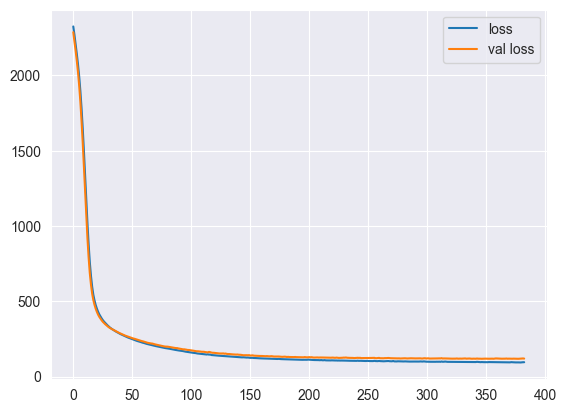

In [22]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend();

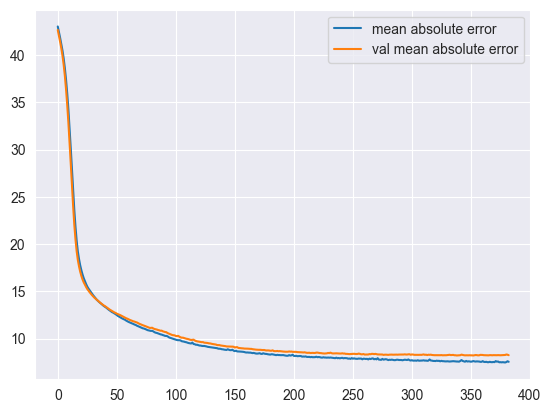

In [23]:
plt.plot(history.history['mae'], label = 'mean absolute error')
plt.plot(history.history['val_mae'], label = 'val mean absolute error')
plt.legend();

In [24]:
pd.DataFrame(model.predict(X_test))

41/41 [==============================] - 0s 2ms/step


,0
0,65.291840
1,47.915237
2,62.133060
3,36.022892
4,68.199646
...,...
1278,46.704445
1279,79.298752
1280,61.933495
1281,57.663803


In [26]:
preds_nn = pd.DataFrame(y_test)

preds_nn['preds'] = model.predict(X_test)

41/41 [==============================] - 0s 2ms/step


In [113]:
preds_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1050 to 2560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numeric_rank  1283 non-null   int64  
 1   preds         1283 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 25.1 KB


In [27]:
preds_nn['dif'] = preds_nn.preds - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

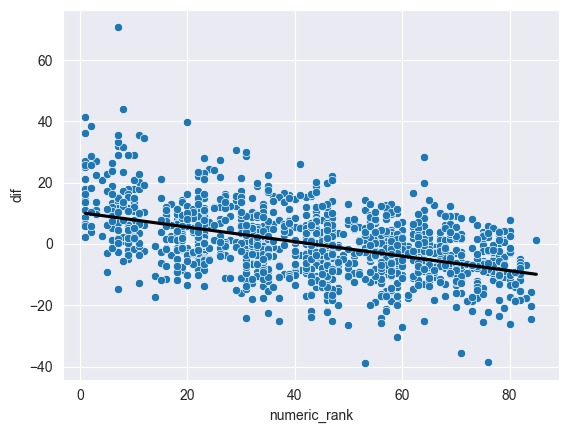

In [28]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.dif, ci = 0, color = 'black', scatter = False)


sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

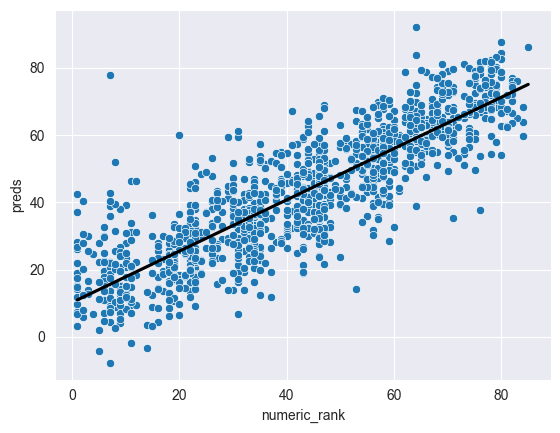

In [29]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.preds)

In [117]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 9ms/step - loss: 117.2778 - mse: 117.2778 - mae: 8.2365


[117.27775573730469, 117.27775573730469, 8.23650074005127]

In [118]:
preds_nn.head(20)

,numeric_rank,preds,dif
1050,63,67.202278,4.202278
1307,43,44.278999,1.278999
4544,71,55.974113,-15.025887
153,55,39.765606,-15.234394
946,63,64.092606,1.092606
4251,50,43.285172,-6.714828
4700,73,65.258102,-7.741898
2763,80,75.084442,-4.915558
3047,31,28.536947,-2.463053
3329,34,22.322598,-11.677402


In [24]:
model.save('../../nn_model_tf_save.h5')

In [76]:
model = load_model('../../nn_model_tf_save.h5')

In [15]:
with open('../../gbrt_5.pkl', 'wb') as picklefile:
    pickle.dump(gbrt_2, picklefile)

In [77]:
boay.drop(columns = 'player_name', inplace = True)
eden.drop(columns = 'player_name', inplace = True)
vinu.drop(columns = 'player_name', inplace = True)
cho.drop(columns = 'player_name', inplace = True)

In [78]:
boay

,bcpm,avg_amount,amount_collected,amount_stolen,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,...,percent_neutral_third,percent_defensive_half,percent_offensive_half,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted
0,420.56630,46.15,2458,558,1802,656,308,337,11.398180,8.495166,...,32.682877,72.465836,27.534163,74.541145,25.458858,36.929306,29.030142,29.571960,40.180220,0
1,420.65347,46.35,2459,558,1803,656,320,338,11.421567,8.487769,...,32.682410,72.470170,27.529830,74.554900,25.445095,36.323204,28.568170,29.252438,39.830074,0
2,359.35208,47.53,2041,178,1394,647,330,312,12.263043,9.302189,...,28.160807,79.184140,20.815855,76.163390,23.836603,38.529255,32.425613,36.181700,31.457245,1
3,393.23465,49.83,2263,588,1674,589,449,296,10.217498,8.523270,...,28.891930,60.963670,39.036340,66.491560,33.508442,27.310375,39.937440,33.044685,35.187813,0
4,393.79007,50.20,2304,280,1717,587,422,183,11.303233,11.288991,...,29.205950,76.566284,23.433712,70.829850,29.170145,31.477000,35.009260,32.986755,36.575985,0
5,393.83493,50.20,2304,280,1717,587,422,183,11.295975,11.256088,...,29.284850,76.610820,23.389183,70.790570,29.209427,31.537561,35.241160,32.591663,36.751087,0
6,419.28705,44.59,2029,320,1293,736,208,344,11.162390,5.658688,...,32.919950,64.744095,35.255905,66.970700,33.029300,31.548130,36.920956,33.270190,31.065954,0
7,363.50080,39.45,1950,505,1089,861,110,283,10.998230,2.165471,...,26.755830,65.821980,34.178010,69.570560,30.429436,30.882034,39.891880,29.204338,43.309410,2
8,449.93176,53.52,2472,643,1936,536,366,373,13.092674,7.225846,...,27.751640,59.321000,40.679000,67.305570,32.694430,28.029730,43.136660,32.489002,36.553920,1
9,358.00120,48.11,2006,166,1212,794,207,107,11.029150,6.748959,...,32.342370,71.735466,28.264528,75.087020,24.912981,38.191547,29.268291,28.524687,39.024387,1


In [25]:
boay_preds = gbrt_2.predict(boay)

In [33]:
boay_preds = [dict_ranks[int(pred)] for pred in boay_preds]
boay_preds

['Champion 3 Division 3',
 'Champion 3 Division 3',
 'Diamond 1 Division 3',
 'Champion 3 Division 1',
 'Champion 2 Division 1',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Diamond 2 Division 4',
 'Champion 2 Division 1',
 'Champion 3 Division 3',
 'Diamond 2 Division 1',
 'Champion 2 Division 4',
 'Champion 3 Division 4',
 'Champion 1 Division 4',
 'Diamond 2 Division 1',
 'Champion 2 Division 1',
 'Diamond 2 Division 3',
 'Diamond 3 Division 1',
 'Champion 3 Division 4']

In [79]:
boay_nn_preds = model.predict(ss.transform(boay))

boay_nn_preds_rank = [dict_ranks[int(pred)] for pred in boay_nn_preds]

boay_nn_preds_rank

1/1 [==============================] - 0s 171ms/step


['Champion 2 Division 4',
 'Champion 2 Division 4',
 'Diamond 2 Division 4',
 'Champion 1 Division 3',
 'Champion 1 Division 3',
 'Champion 1 Division 3',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 1 Division 4',
 'Champion 2 Division 1',
 'Diamond 3 Division 1',
 'Champion 1 Division 4',
 'Champion 3 Division 3',
 'Champion 2 Division 1',
 'Diamond 2 Division 4',
 'Champion 1 Division 2',
 'Diamond 2 Division 4',
 'Champion 1 Division 1',
 'Champion 3 Division 1']

Text(84.5, 4.5, 'SSL')

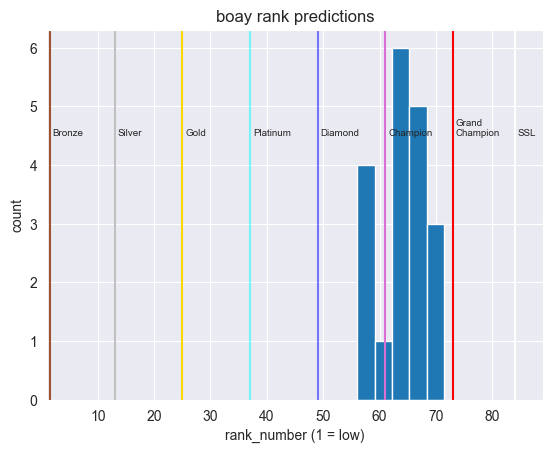

In [121]:
plt.hist(boay_nn_preds, bins = 5)
plt.xlim(1,89)
plt.title('boay rank predictions')
plt.ylabel('count')
plt.xlabel('rank_number (1 = low)')
plt.axvline(1.5, alpha = 1, color = 'sienna')
plt.text(2, 4.5, '''Bronze''', fontsize=7, zorder = 11)
plt.axvline(13, alpha = 1, color = 'silver')
plt.text(13.5, 4.5, '''Silver''', fontsize=7, zorder = 11)
plt.axvline(25, alpha = 1, color = 'gold')
plt.text(25.5, 4.5, '''Gold''', fontsize=7, zorder = 11)
plt.axvline(37, alpha = 0.5, color = 'cyan')
plt.text(37.5, 4.5, '''Platinum''', fontsize=7, zorder = 11)
plt.axvline(49, alpha = 0.5, color = 'blue')
plt.text(49.5, 4.5, '''Diamond''', fontsize=7, zorder = 11)
plt.axvline(61, alpha = 1, color = 'orchid')
plt.text(61.5, 4.5, '''Champion''', fontsize=7, zorder = 11)
plt.axvline(73, alpha = 1, color = 'red')
plt.text(73.5, 4.5, '''Grand
Champion''', fontsize=7, zorder = 11)
plt.axvline(84, alpha = 1, color = 'white')
plt.text(84.5, 4.5, '''SSL''', fontsize=7, zorder = 11)

In [264]:
boay.to_csv('../data/boay_for_testing.csv')

In [84]:
eden.drop(columns = 'goals_against_while_last_defender', inplace = True)
vinu.drop(columns = 'goals_against_while_last_defender', inplace = True)
cho.drop(columns = 'goals_against_while_last_defender', inplace = True)

In [85]:
eden_preds = gbrt_2.predict(eden)
eden_preds = [dict_ranks[int(pred)] for pred in eden_preds]
eden_preds

['Champion 3 Division 2',
 'Champion 3 Division 2',
 'Champion 3 Division 3',
 'Champion 3 Division 3',
 'Champion 3 Division 4',
 'Grand Champion 1 Division 1',
 'Grand Champion 1 Division 1',
 'Champion 2 Division 2',
 'Grand Champion 2 Division 1',
 'Grand Champion 1 Division 4',
 'Champion 3 Division 1',
 'Champion 3 Division 2',
 'Champion 1 Division 1',
 'Champion 3 Division 2',
 'Grand Champion 1 Division 1',
 'Grand Champion 1 Division 1',
 'Diamond 3 Division 4',
 'Champion 3 Division 1',
 'Champion 3 Division 2',
 'Champion 1 Division 3',
 'Grand Champion 1 Division 1',
 'Diamond 3 Division 1',
 'Champion 1 Division 3',
 'Champion 3 Division 3']

In [86]:
eden_nn_preds = model.predict(ss.transform(eden))

eden_nn_preds_rank = [dict_ranks[int(pred)] for pred in eden_nn_preds]

eden_nn_preds_rank

1/1 [==============================] - 0s 45ms/step


['Champion 3 Division 4',
 'Champion 3 Division 4',
 'Champion 3 Division 3',
 'Champion 3 Division 2',
 'Champion 1 Division 3',
 'Champion 3 Division 2',
 'Champion 3 Division 3',
 'Champion 2 Division 2',
 'Champion 3 Division 4',
 'Champion 2 Division 3',
 'Champion 3 Division 1',
 'Champion 3 Division 2',
 'Champion 1 Division 4',
 'Champion 2 Division 2',
 'Champion 3 Division 2',
 'Champion 3 Division 2',
 'Champion 1 Division 4',
 'Grand Champion 1 Division 1',
 'Diamond 2 Division 4',
 'Grand Champion 2 Division 4',
 'Champion 1 Division 4',
 'Champion 1 Division 2',
 'Champion 1 Division 1',
 'Champion 3 Division 1']

Text(84.5, 4.5, 'SSL')

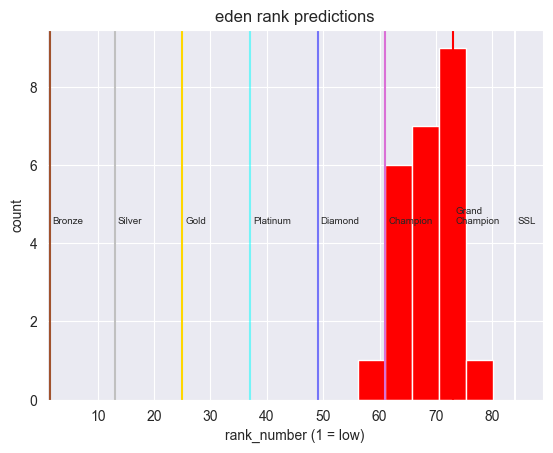

In [128]:
plt.hist(eden_nn_preds, bins = 5, color = 'red')
plt.xlim(1,89)
plt.title('eden rank predictions')
plt.ylabel('count')
plt.xlabel('rank_number (1 = low)')
plt.axvline(1.5, alpha = 1, color = 'sienna')
plt.text(2, 4.5, '''Bronze''', fontsize=7, zorder = 11)
plt.axvline(13, alpha = 1, color = 'silver')
plt.text(13.5, 4.5, '''Silver''', fontsize=7, zorder = 11)
plt.axvline(25, alpha = 1, color = 'gold')
plt.text(25.5, 4.5, '''Gold''', fontsize=7, zorder = 11)
plt.axvline(37, alpha = 0.5, color = 'cyan')
plt.text(37.5, 4.5, '''Platinum''', fontsize=7, zorder = 11)
plt.axvline(49, alpha = 0.5, color = 'blue')
plt.text(49.5, 4.5, '''Diamond''', fontsize=7, zorder = 11)
plt.axvline(61, alpha = 1, color = 'orchid')
plt.text(61.5, 4.5, '''Champion''', fontsize=7, zorder = 11)
plt.axvline(73, alpha = 1, color = 'red')
plt.text(73.5, 4.5, '''Grand
Champion''', fontsize=7, zorder = 11)
plt.axvline(84, alpha = 1, color = 'white')
plt.text(84.5, 4.5, '''SSL''', fontsize=7, zorder = 11)

In [37]:
vinu_preds = gbrt_2.predict(vinu)
vinu_preds = [dict_ranks[int(pred)] for pred in vinu_preds]
vinu_preds

['Diamond 3 Division 1',
 'Diamond 3 Division 4',
 'Diamond 3 Division 3',
 'Champion 3 Division 1',
 'Champion 1 Division 2',
 'Champion 3 Division 2',
 'Champion 2 Division 2',
 'Diamond 1 Division 4',
 'Diamond 2 Division 1',
 'Platinum 3 Division 2',
 'Platinum 2 Division 3',
 'Champion 1 Division 4',
 'Grand Champion 1 Division 3',
 'Diamond 1 Division 2',
 'Platinum 3 Division 3',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 3 Division 2',
 'Champion 3 Division 2']

In [88]:
vinu_nn_preds = model.predict(ss.transform(vinu))

vinu_nn_preds_rank = [dict_ranks[int(pred)] for pred in vinu_nn_preds]

vinu_nn_preds_rank

1/1 [==============================] - 0s 68ms/step


['Diamond 3 Division 4',
 'Champion 1 Division 1',
 'Champion 1 Division 1',
 'Champion 2 Division 3',
 'Champion 2 Division 4',
 'Champion 3 Division 2',
 'Champion 3 Division 1',
 'Diamond 3 Division 4',
 'Champion 1 Division 1',
 'Diamond 1 Division 1',
 'Platinum 2 Division 1',
 'Diamond 2 Division 4',
 'Champion 3 Division 3',
 'Diamond 3 Division 1',
 'Diamond 2 Division 2',
 'Champion 2 Division 2',
 'Champion 1 Division 2',
 'Champion 3 Division 3',
 'Champion 3 Division 3']

Text(84.5, 4.5, 'SSL')

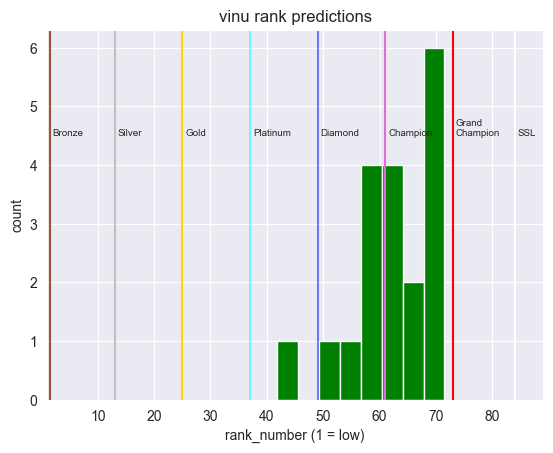

In [127]:
plt.hist(vinu_nn_preds, bins = 8, color = 'green')
plt.xlim(1,89)
plt.title('vinu rank predictions')
plt.ylabel('count')
plt.xlabel('rank_number (1 = low)')
plt.axvline(1.5, alpha = 1, color = 'sienna')
plt.text(2, 4.5, '''Bronze''', fontsize=7, zorder = 11)
plt.axvline(13, alpha = 1, color = 'silver')
plt.text(13.5, 4.5, '''Silver''', fontsize=7, zorder = 11)
plt.axvline(25, alpha = 1, color = 'gold')
plt.text(25.5, 4.5, '''Gold''', fontsize=7, zorder = 11)
plt.axvline(37, alpha = 0.5, color = 'cyan')
plt.text(37.5, 4.5, '''Platinum''', fontsize=7, zorder = 11)
plt.axvline(49, alpha = 0.5, color = 'blue')
plt.text(49.5, 4.5, '''Diamond''', fontsize=7, zorder = 11)
plt.axvline(61, alpha = 1, color = 'orchid')
plt.text(61.5, 4.5, '''Champion''', fontsize=7, zorder = 11)
plt.axvline(73, alpha = 1, color = 'red')
plt.text(73.5, 4.5, '''Grand
Champion''', fontsize=7, zorder = 11)
plt.axvline(84, alpha = 1, color = 'white')
plt.text(84.5, 4.5, '''SSL''', fontsize=7, zorder = 11)

In [38]:
cho_preds = gbrt_2.predict(cho)
cho_preds = [dict_ranks[int(pred)] for pred in cho_preds]
cho_preds

['Diamond 3 Division 2',
 'Diamond 3 Division 2',
 'Champion 3 Division 2',
 'Diamond 2 Division 3',
 'Diamond 3 Division 2',
 'Champion 2 Division 4',
 'Diamond 2 Division 4',
 'Diamond 3 Division 2',
 'Champion 3 Division 3',
 'Diamond 3 Division 2',
 'Diamond 3 Division 1',
 'Diamond 1 Division 3',
 'Champion 2 Division 3',
 'Diamond 1 Division 1',
 'Diamond 3 Division 1',
 'Diamond 1 Division 3',
 'Diamond 3 Division 3',
 'Diamond 2 Division 2',
 'Diamond 2 Division 4']

In [91]:
cho_nn_preds = model.predict(ss.transform(cho))

cho_nn_preds_rank = [dict_ranks[int(pred)] for pred in cho_nn_preds]

cho_nn_preds_rank

1/1 [==============================] - 0s 75ms/step


['Diamond 2 Division 3',
 'Diamond 2 Division 1',
 'Champion 3 Division 3',
 'Champion 1 Division 3',
 'Diamond 3 Division 1',
 'Champion 1 Division 2',
 'Diamond 3 Division 1',
 'Diamond 2 Division 1',
 'Champion 3 Division 1',
 'Diamond 3 Division 4',
 'Diamond 2 Division 2',
 'Platinum 3 Division 4',
 'Diamond 3 Division 3',
 'Diamond 1 Division 1',
 'Diamond 2 Division 1',
 'Platinum 3 Division 2',
 'Diamond 1 Division 4',
 'Diamond 1 Division 2',
 'Champion 1 Division 1']

Text(84.5, 2.75, 'SSL')

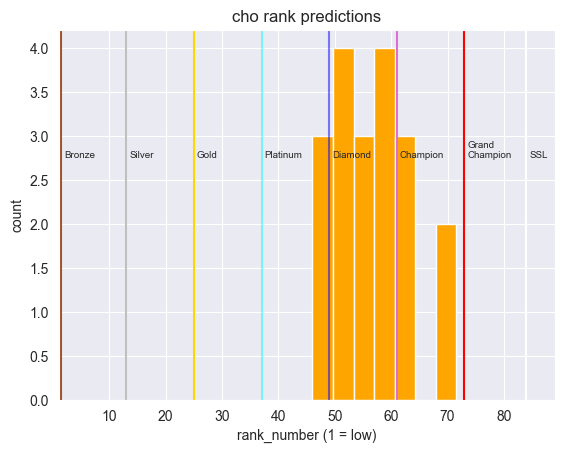

In [126]:
plt.hist(cho_nn_preds, bins = 7, color = 'orange')
plt.xlim(1,89)
plt.title('cho rank predictions')
plt.ylabel('count')
plt.xlabel('rank_number (1 = low)')
plt.axvline(1.5, alpha = 1, color = 'sienna')
plt.text(2, 2.75, '''Bronze''', fontsize=7, zorder = 11)
plt.axvline(13, alpha = 1, color = 'silver')
plt.text(13.5, 2.75, '''Silver''', fontsize=7, zorder = 11)
plt.axvline(25, alpha = 1, color = 'gold')
plt.text(25.5, 2.75, '''Gold''', fontsize=7, zorder = 11)
plt.axvline(37, alpha = 0.5, color = 'cyan')
plt.text(37.5, 2.75, '''Platinum''', fontsize=7, zorder = 11)
plt.axvline(49, alpha = 0.5, color = 'blue')
plt.text(49.5, 2.75, '''Diamond''', fontsize=7, zorder = 11)
plt.axvline(61, alpha = 1, color = 'orchid')
plt.text(61.5, 2.75, '''Champion''', fontsize=7, zorder = 11)
plt.axvline(73, alpha = 1, color = 'red')
plt.text(73.5, 2.75, '''Grand
Champion''', fontsize=7, zorder = 11)
plt.axvline(84, alpha = 1, color = 'white')
plt.text(84.5,2.75, '''SSL''', fontsize=7, zorder = 11)

In [39]:
def predict_rank(df):
    
    df.dropna(inplace =True)
    
    to_drop = [
    # 'shots',
    # 'goals',
    # 'saves',
    # 'assists',
    # 'score',
    # 'mvp'
    ]
    
    df.drop(columns = to_drop, inplace = True)
    
    try:
        df.drop(columns = 'Unnamed: 0', inplace = True)
    except KeyError:
        pass
    
    try:
        df.drop(columns = 'player_name', inplace = True)
    except KeyError:
        pass
    
    rank_preds = model.predict(ss.transform(df))
    rank_preds = [dict_ranks[int(pred)] for pred in rank_preds]
    return rank_preds

In [40]:
predict_rank(boay)

1/1 [==============================] - 0s 33ms/step


['Champion 3 Division 4',
 'Champion 3 Division 4',
 'Diamond 2 Division 2',
 'Champion 2 Division 1',
 'Champion 1 Division 1',
 'Champion 1 Division 2',
 'Champion 2 Division 2',
 'Grand Champion 1 Division 1',
 'Champion 2 Division 1',
 'Champion 2 Division 1',
 'Champion 1 Division 2',
 'Champion 1 Division 4',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Champion 1 Division 1',
 'Champion 2 Division 3',
 'Diamond 3 Division 2',
 'Diamond 2 Division 2',
 'Champion 3 Division 2']